# Logistic regression: Synthetic Data

X_np @ theta_tru

$(X \theta^*)_i = x_i^T \theta^* = (\theta^*)^T x_i$

Logistic regression is not a generative model. To generate data, we need to specify the marginal distribution of the feauturs ($X$), which we take to be a simple 2-D Gaussian for this example.

(-3.73144470440955, 3.352068074582304, -3.117751419978939, 3.4367993436748003)

<Figure size 500x500 with 0 Axes>

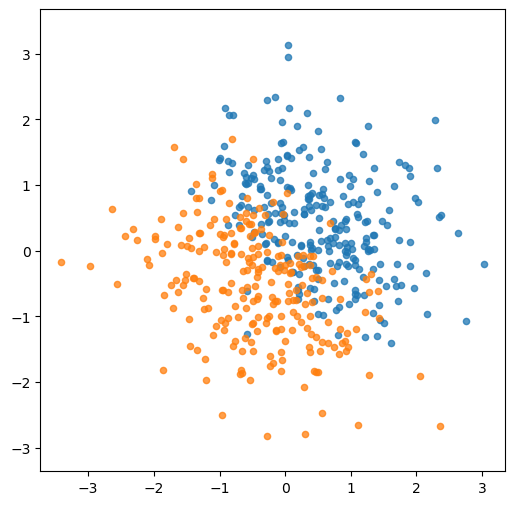

In [96]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

n_train = 500
# X_np = np.hstack([np.ones((n_train, 1)), np.random.randn(n_train, 2)])
X_np = np.random.randn(n_train, 2)
snr = 1
theta_tru = np.array([3, 3])*snr
prob = 1/(1+np.exp(-X_np @ theta_tru))
# Draw samples from a bernoulli distribution with probabilities given in vector prob
y_np = np.random.binomial(1, prob)


plt.figure(figsize=(5,5))
plot_points(y_np, X_np)
plt.axis('equal')


In [97]:
import torch

X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float()
y.shape

torch.Size([500])

$\ell_{\log}(y,z) = -yz + \log(1+e^z)$ 

$\frac1n \sum_{i=1}^n \ell_{\log}(y_i, x_i^T \theta)$

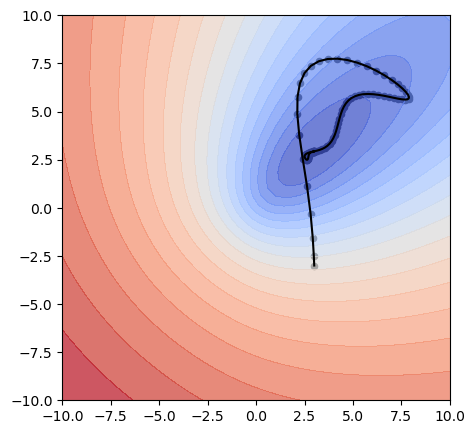

In [107]:
import torch
from helpers import *
import torch.nn.functional as F

def my_loss(theta):
    z = X @ theta
    return torch.mean(-y * z + torch.log(1 + torch.exp(z)))

# def torch_loss(theta):
#     return F.cross_entropy(torch.stack([torch.zeros(n_train), X @ theta], dim=1), y.flatten().long(), reduction='mean')

theta = torch.tensor([3, -3.], requires_grad=True)

# loss_hist, theta_list = our_gd(my_loss, theta, lr = 2, n_steps = 50)
loss_hist, theta_list = gd_with_momentum(my_loss, theta, momentum=0.9, lr=1, n_steps=100) 


xrange = yrange = (-10, 10) #(-5*snr , 5*snr)
_ = plot_gd_trajectory(theta_list, my_loss, xrange, yrange, figsize=(5, 5))

In [108]:
theta_list[-1] # theta_list[-1] is the final estimate of theta

tensor([2.9598, 2.9395], grad_fn=<CloneBackward0>)

In [109]:
theta_list[::10] # theta_list[::10] is the estimate of theta every 10 steps

[tensor([ 3., -3.], grad_fn=<CloneBackward0>),
 tensor([2.4969, 6.9946], grad_fn=<CloneBackward0>),
 tensor([6.9927, 6.6424], grad_fn=<CloneBackward0>),
 tensor([7.3241, 5.6682], grad_fn=<CloneBackward0>),
 tensor([4.9206, 5.6983], grad_fn=<CloneBackward0>),
 tensor([4.0641, 3.7952], grad_fn=<CloneBackward0>),
 tensor([2.8785, 2.9053], grad_fn=<CloneBackward0>),
 tensor([2.5652, 2.5275], grad_fn=<CloneBackward0>),
 tensor([2.7151, 2.7225], grad_fn=<CloneBackward0>),
 tensor([2.9261, 2.8970], grad_fn=<CloneBackward0>),
 tensor([2.9598, 2.9395], grad_fn=<CloneBackward0>)]

In [110]:
theta_tru, theta_list[-1] # theta_tru is the true value of theta

(array([3, 3]), tensor([2.9598, 2.9395], grad_fn=<CloneBackward0>))

# Sandbox

The following code verfies that for the 2-class problem, the log-loss for logistic regression matches what we get from sotfmax regression.

In [123]:
X = torch.tensor([[1., 2], [-3, 4], [5, 6]])
y = torch.tensor([0, 1, 0])
n_train = X.shape[0]

def our_loss(theta):
    z = X @ theta
    return torch.mean(-y * z + torch.log(1 + torch.exp(z)))

def torch_loss(theta):
    return F.cross_entropy(torch.stack([torch.zeros(n_train), X @ theta], dim=1), y.flatten().long(), reduction='mean')

# Generate random theta
theta = torch.randn(2, requires_grad=True)

# print our_loss(theta) versus torch_loss(theta)
print(our_loss(theta), torch_loss(theta))
torch.allclose(our_loss(theta), torch_loss(theta))

tensor(0.1972, grad_fn=<MeanBackward0>) tensor(0.1972, grad_fn=<NllLossBackward0>)


True